# Surface quality measurements using vedo in napari
The [vedo library](https://vedo.embl.es/) offers a set of measurements to describe surfaces. This notebook shows how to use them on surface data in napari.

See also
* [vedo add_quality documentation](https://vedo.embl.es/autodocs/content/vedo/mesh.html#vedo.mesh.Mesh.addQuality)

In [1]:
import napari
import matplotlib.pyplot as plt
from napari.utils import nbscreenshot
import numpy as np
import pandas as pd
from napari_process_points_and_surfaces import \
    largest_label_to_surface,\
    smooth_surface,\
    add_quality,\
    Quality

import vedo

In [2]:
viewer = napari.Viewer(ndisplay=3)

def hide_all(viewer):
    for layer in viewer.layers:
        layer.visible = False
        
def show_all(viewer):
    for layer in viewer.layers:
        layer.visible = True

In [3]:
from skimage.data import cells3d
nuclei = cells3d()[:,1,60:120,30:80]
nuclei.shape

(60, 60, 50)

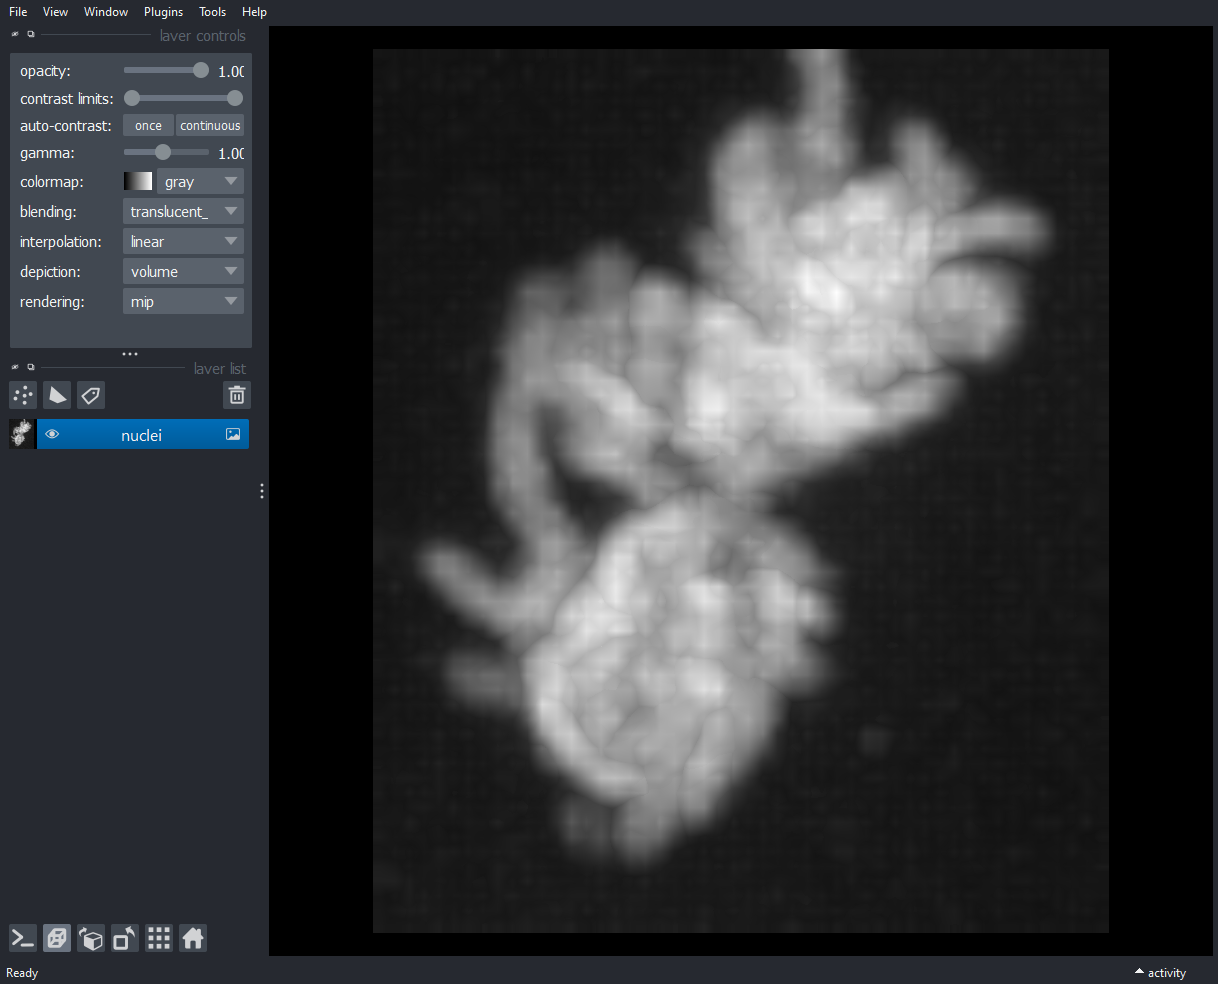

In [4]:
viewer.add_image(nuclei)

nbscreenshot(viewer)

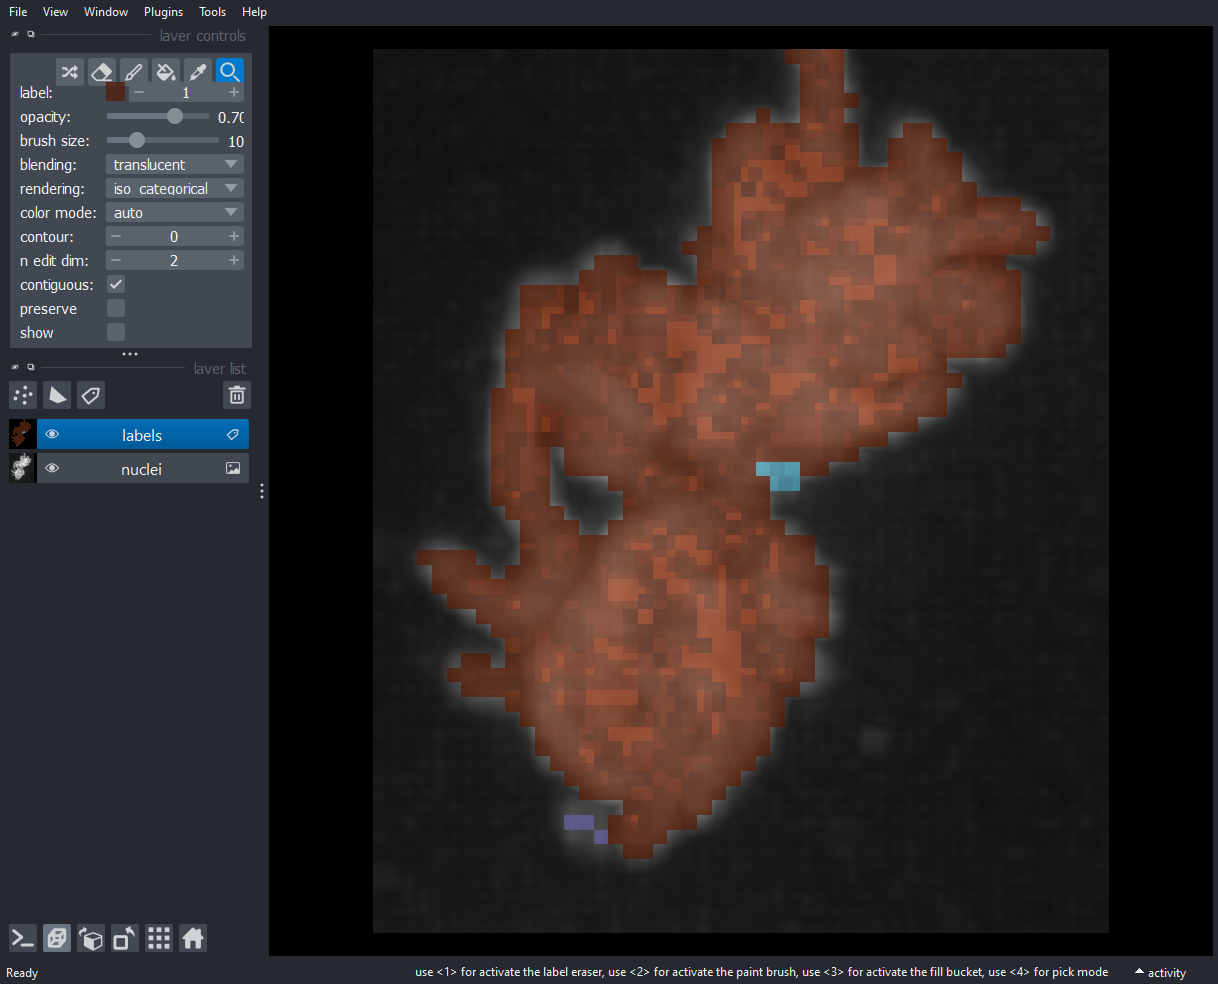

In [5]:
from skimage.measure import label
labels = label(nuclei>20000)

viewer.add_labels(labels)

nbscreenshot(viewer)

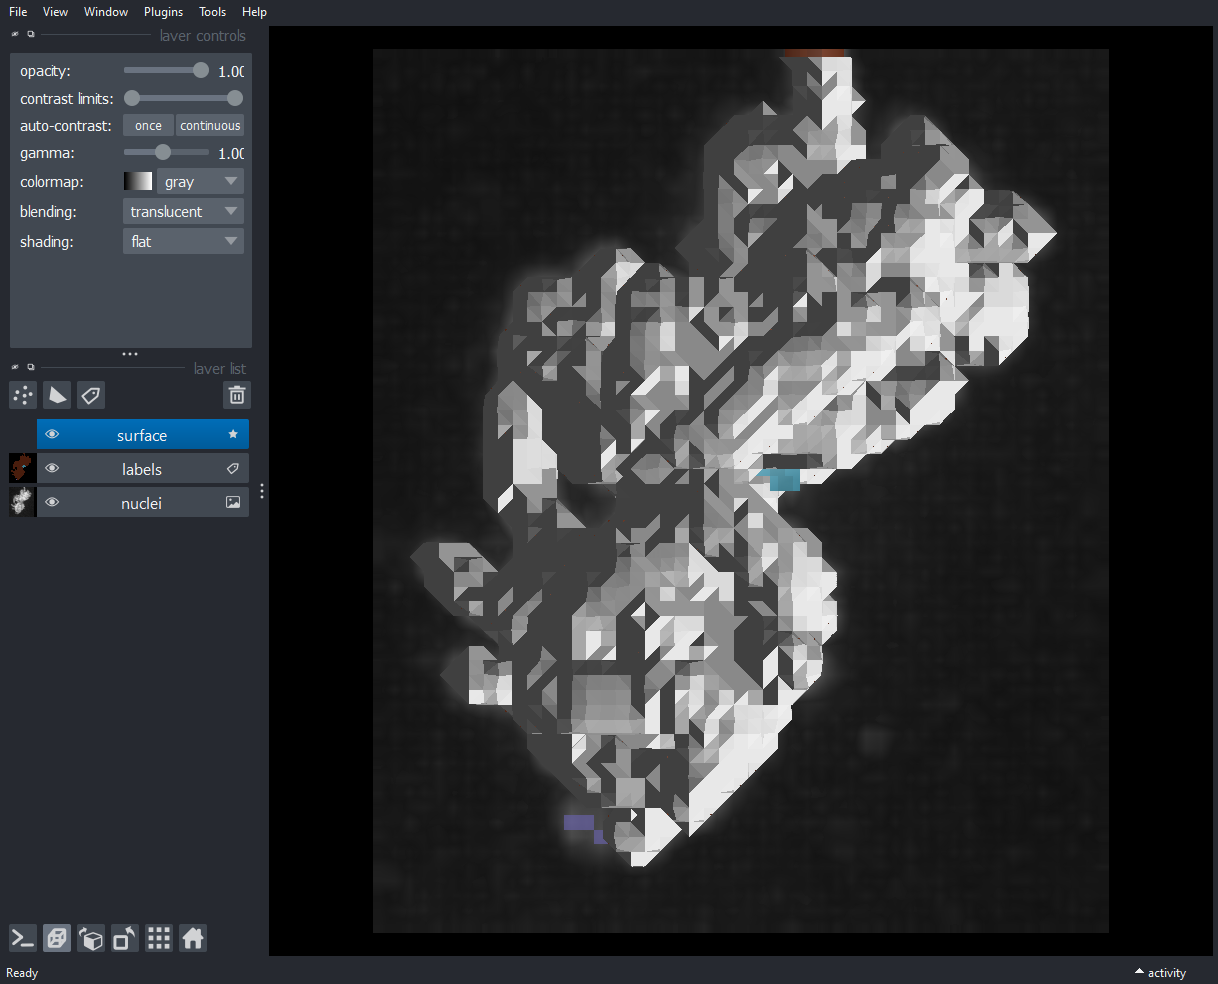

In [6]:
surface = largest_label_to_surface(labels)
surface = smooth_surface(surface, 5)

surface_layer = viewer.add_surface(surface, blending='translucent', shading='flat')
surface = surface_layer.data

nbscreenshot(viewer)

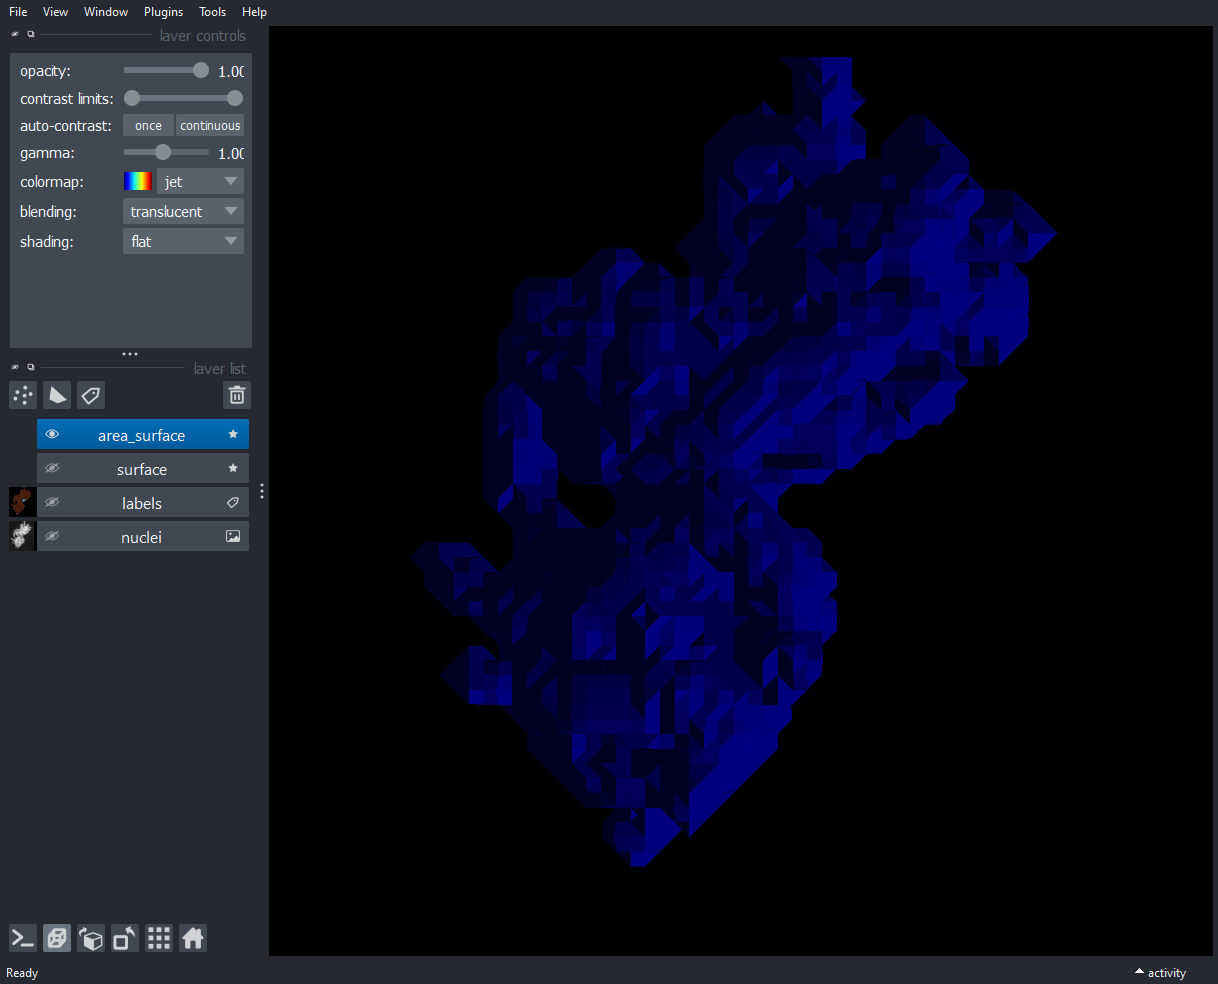

In [7]:
hide_all(viewer)

area_surface = add_quality(surface, quality_id=Quality.AREA)
viewer.add_surface(area_surface, colormap='jet')

nbscreenshot(viewer)

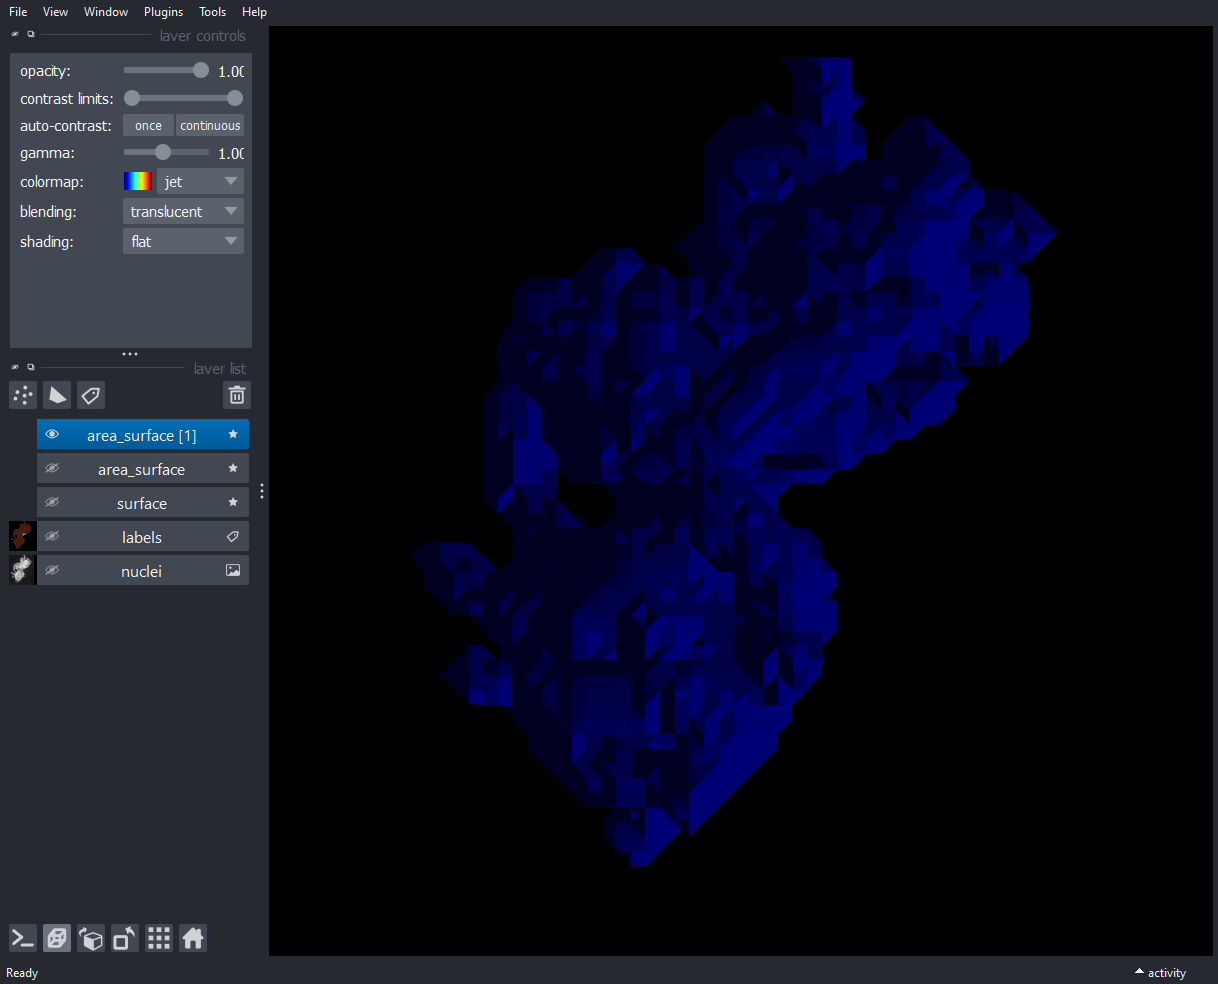

In [8]:
hide_all(viewer)

area_surface = add_quality(surface, quality_id=Quality.ASPECT_RATIO)
viewer.add_surface(area_surface, colormap='jet')

nbscreenshot(viewer)

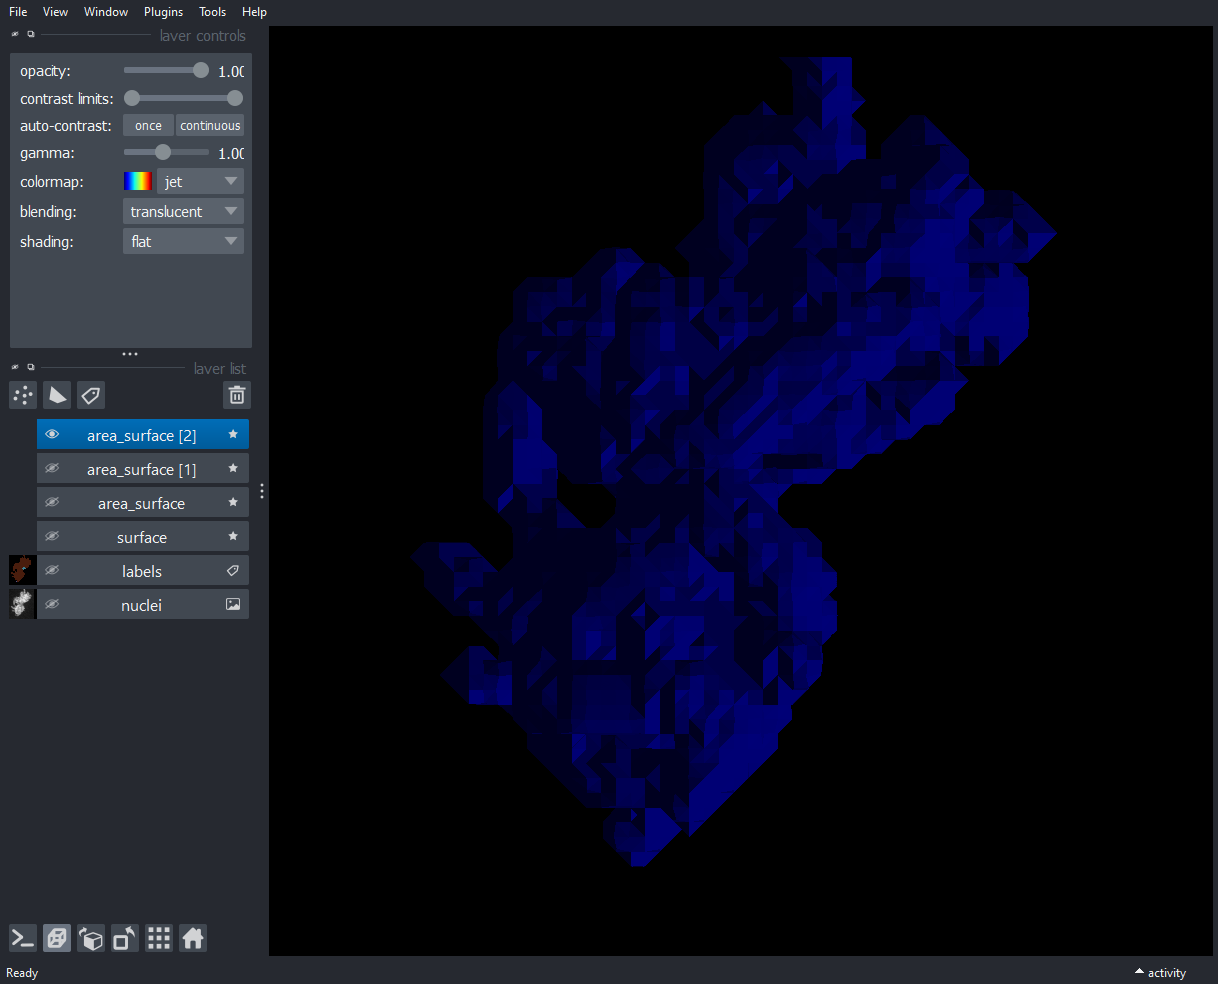

In [9]:
hide_all(viewer)

area_surface = add_quality(surface, quality_id=Quality.DISTORTION)
viewer.add_surface(area_surface, colormap='jet')

nbscreenshot(viewer)

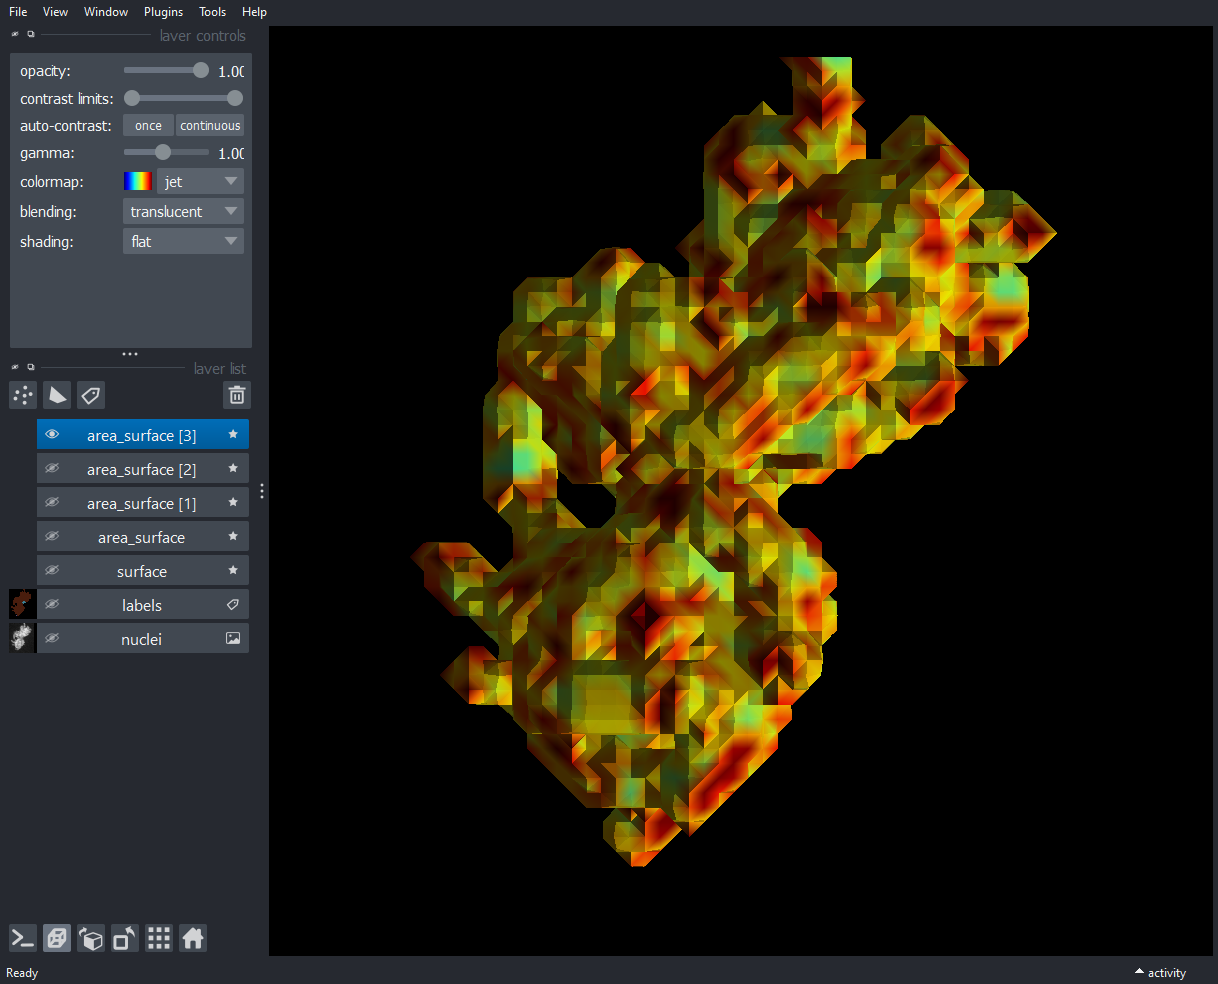

In [10]:
hide_all(viewer)

area_surface = add_quality(surface, quality_id=Quality.MIN_ANGLE)
viewer.add_surface(area_surface, colormap='jet')

nbscreenshot(viewer)

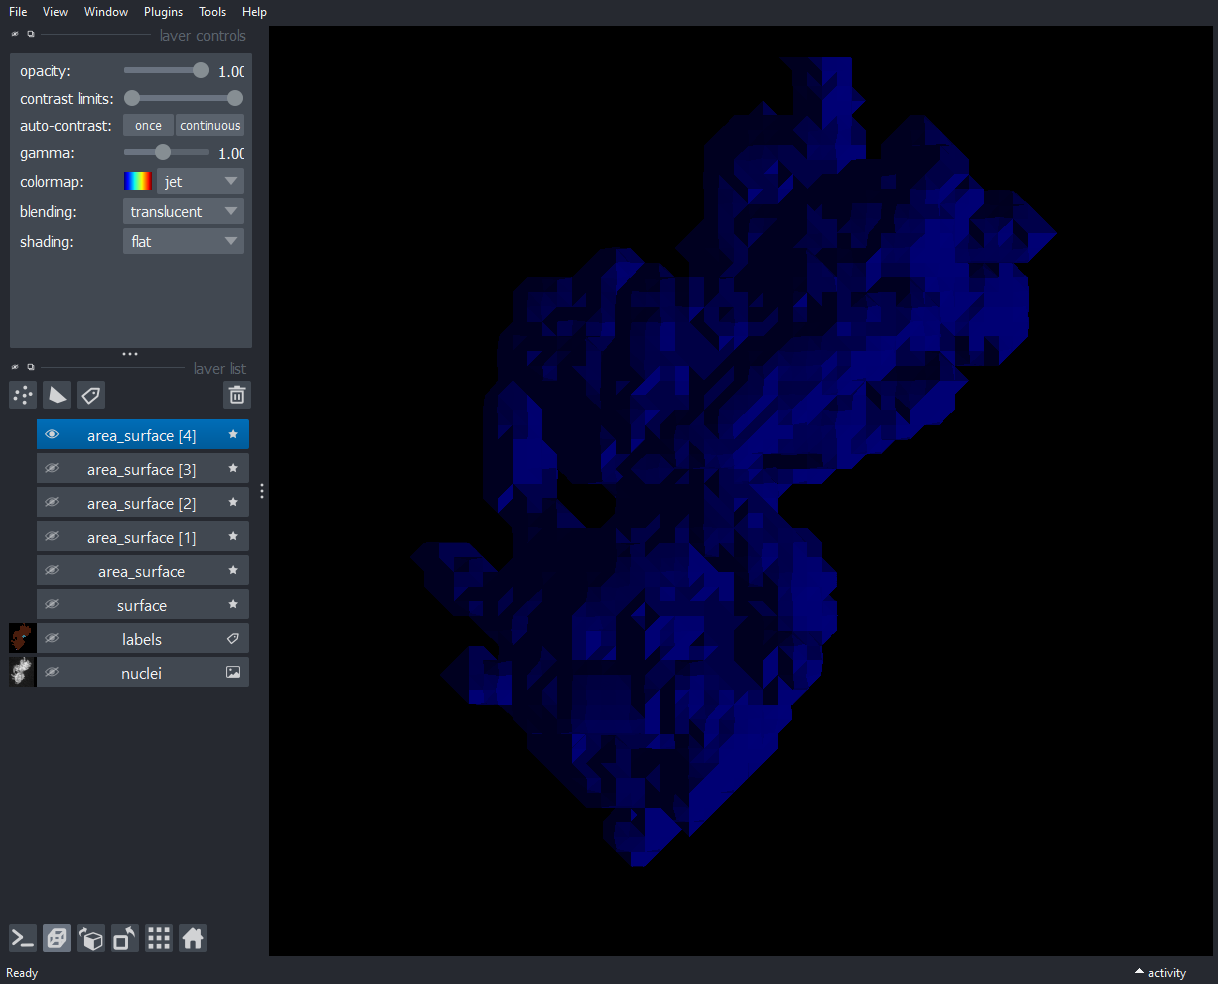

In [11]:
hide_all(viewer)

area_surface = add_quality(surface, quality_id=Quality.CONDITION)
viewer.add_surface(area_surface, colormap='jet')

nbscreenshot(viewer)

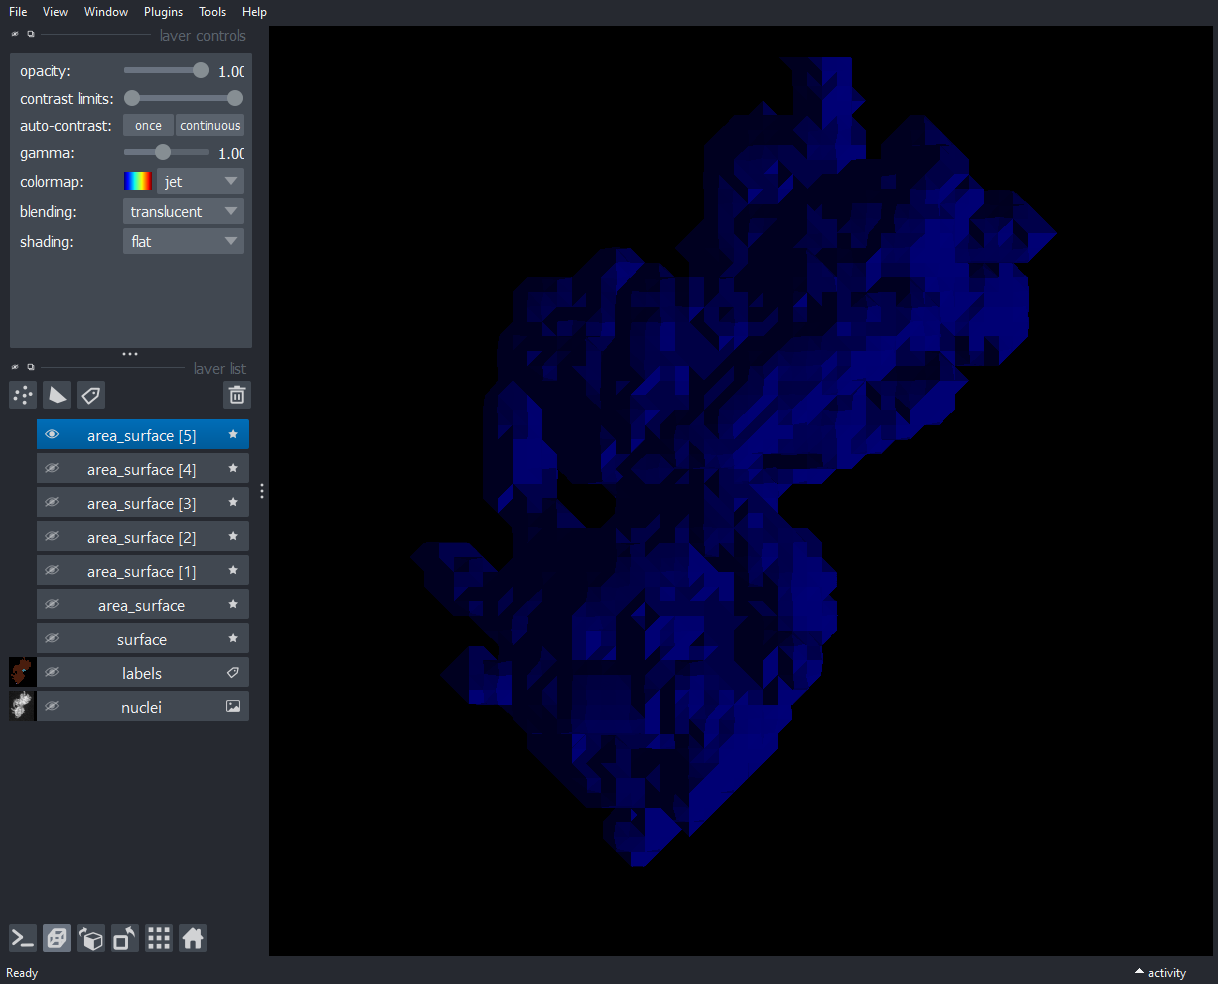

In [12]:
hide_all(viewer)

area_surface = add_quality(surface, quality_id=Quality.MAX_ANGLE)
viewer.add_surface(area_surface, colormap='jet')

nbscreenshot(viewer)

## Reading out values
After measurements have been visualized, you can read them out:

In [13]:
vertices, faces, values = viewer.layers[-1].data

table = {
    "X": vertices[:,2],
    "Y": vertices[:,1],
    "Z": vertices[:,0],
    "value":values
}

pd.DataFrame(table)

X          Y          Z      value
0     31.000544  16.999184  19.998524  60.000000
1     30.000466  17.999262  19.998524  70.304849
2     31.000544  17.999262  18.998446  75.000000
3     32.000621  17.999262  19.998524  70.576201
4     28.000311  17.999262  19.998524  78.468201
...         ...        ...        ...        ...
6648  18.095556  33.920253  58.776568  77.335276
6649  12.999146  35.000583  59.001554  68.071598
6650  14.999301  35.000583  59.001554  68.615235
6651  16.999456  35.000583  59.001554  90.000000
6652  15.999379  36.000660  59.001554  80.000000

[6653 rows x 4 columns]

## Other mesh quality measurements
There are more mesh quality measurements available. Not all work on all meshes. Watch out for an error message in a grey window.

In [14]:
for q in Quality:
    print(q)

Quality.EDGE_RATIO
Quality.ASPECT_RATIO
Quality.RADIUS_RATIO
Quality.ASPECT_FROBENIUS
Quality.MED_ASPECT_FROBENIUS
Quality.MAX_ASPECT_FROBENIUS
Quality.MIN_ANGLE
Quality.COLLAPSE_RATIO
Quality.MAX_ANGLE
Quality.CONDITION
Quality.SCALED_JACOBIAN
Quality.SHEAR
Quality.RELATIVE_SIZE_SQUARED
Quality.SHAPE
Quality.SHAPE_AND_SIZE
Quality.DISTORTION
Quality.MAX_EDGE_RATIO
Quality.SKEW
Quality.TAPER
Quality.VOLUME
Quality.STRETCH
Quality.DIAGONAL
Quality.DIMENSION
Quality.ODDY
Quality.SHEAR_AND_SIZE
Quality.JACOBIAN
Quality.WARPAGE
Quality.ASPECT_GAMMA
Quality.AREA
Quality.ASPECT_BETA
Quality.GAUSS_CURVATURE
Quality.MEAN_CURVATURE
Quality.MAXIMUM_CURVATURE
Quality.MINIMUM_CURVATURE
Quality.SPHERE_FITTED_CURVATURE_1_PERCENT
Quality.SPHERE_FITTED_CURVATURE_2_PERCENT
Quality.SPHERE_FITTED_CURVATURE_5_PERCENT
Quality.SPHERE_FITTED_CURVATURE_10_PERCENT
Quality.SPHERE_FITTED_CURVATURE_25_PERCENT
Quality.SPHERE_FITTED_CURVATURE_50_PERCENT


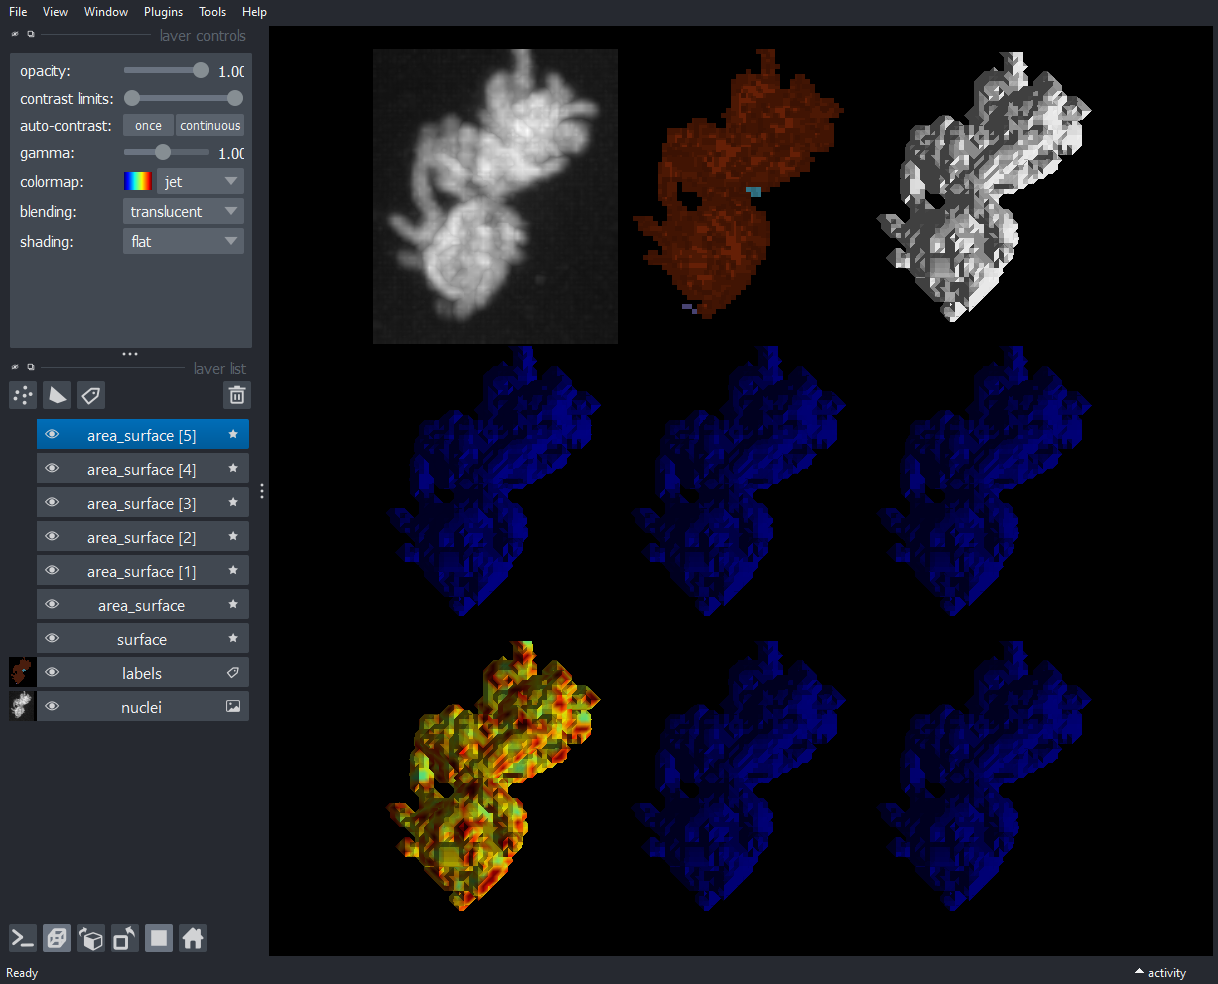

In [15]:
show_all(viewer)
viewer.grid.enabled = True
viewer.grid.stride = -1
nbscreenshot(viewer)